In [1]:
filename = 'test2.sdt'

In [2]:
import sdtfile
import numpy as np
import zipfile
import read_wiscscan_sdt as wiscsdt

try:
    test_sdtfile=sdtfile.SdtFile(filename)
    test_data=test_sdtfile.data[0].transpose(2,1,0)
    t_resolution = (test_sdtfile.times[0][1]-test_sdtfile.times[0][0]) * 10**9 # working in nanoseconds
    print(t_resolution,' ns')

except NotImplementedError:
    test_data,times = wiscsdt.read_sdt_wiscscan(filename)
    test_data = np.transpose(test_data,[2,0,1])
    t_resolution = (times[0][1]-times[0][0])* 10**9 
    print(t_resolution,' ns')

[256, 256, 256, 1]
READ DATA IN: (256, 256, 256)
0.03908872878155556  ns


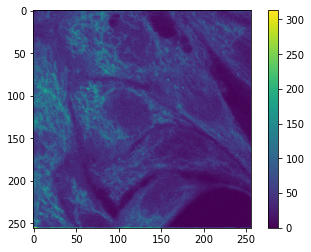

In [3]:
import matplotlib.pyplot as plt

plt.imshow(test_data.sum(0))
plt.colorbar()

In [4]:
import imagej
ij_local_installation=r'C:\Fiji.app'
ij = imagej.init(ij_local_installation,headless=True)
ij.ui().showUI()

In [5]:
%%time
FitParams = imagej.sj.jimport('flimlib.flimj.FitParams')
fitParams = FitParams()
fitParams.transMap = ij.py.to_java(test_data)
fitParams.xInc = t_resolution
fitParams.ltAxis = 2
fitResults = ij.op().run("flim.fitRLD",fitParams)

Wall time: 1.39 s


In [6]:
paramMap = ij.py.from_java(fitResults.paramMap)

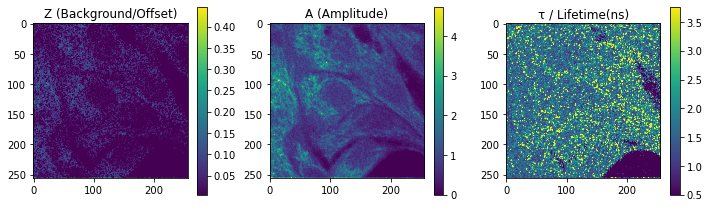

In [7]:
plt.figure(figsize=[10,3])

plt.subplot(131)
plt.imshow(paramMap[0],vmin=paramMap[0].mean())
plt.colorbar()
plt.title('Z (Background/Offset)')

plt.subplot(132)
plt.imshow(paramMap[1],vmax=paramMap[1].mean()*5)
plt.colorbar()
plt.title('A (Amplitude)')

plt.subplot(133)
plt.imshow(paramMap[2],vmax=paramMap[2].mean()*2,vmin=0.5)
plt.colorbar()
plt.title('τ / Lifetime(ns)')

plt.tight_layout()

In [8]:
ij.dispose()